# House Prices - Advanced Regression Techniques
*Preços de Casas - Técnicas Avançadas de Regressão*

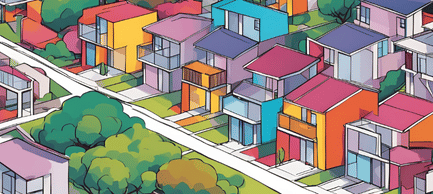

Trata-se de um projeto no qual usa-se um apanhado de informações sobre casas da cidade de Ames, Iowa (EUA), e, baseado nessas informações, divididas em 79 variáveis descritivas de centenas de casas, busca-se ter uma previsão dos preços de demais moradias que venham a integrar a base de dados.

In [55]:
# Importação do pandas
import pandas as pd
import numpy as np

In [12]:
# Importação da base de dados de treino
base = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
base.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Tamanho da base
base.shape

(1460, 81)

In [13]:
# Verificando informações da base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
# Valores nulos da base em ordem decrescente
base.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [16]:
# Separação das colunas com mais de 10% dos valores nulos
dropadas = base.columns[base.isnull().sum() > base.shape[0] * 0.1]
dropadas

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [17]:
# Eliminação das colunas na base principal
base.drop(dropadas, axis=1, inplace=True)

In [20]:
# Vendo tipos de cada coluna (para eliminar as não-numéricas)
base.dtypes
colunas_obj = base.columns[base.dtypes == 'object']
base2 = base.drop(colunas_obj, axis=1)
base2.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [24]:
# Corrigindo valores nulos restantes
# Nulos = -1
base2.isnull().sum().sort_values(ascending=False)
base2.fillna(-1, inplace=True)

In [30]:
# Coluna MSSubClass deve ser eliminada, por ser classificatória
# base2.drop('MSSubClass', axis=1, inplace=True)
base2.shape

(1460, 36)

## Criação do Modelo

In [31]:
# Começo com a separação dos dados em treino e teste
X = base2.drop('SalePrice', axis=1)
y = base2['SalePrice']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [32]:
# REGRESSÃO LINEAR
from sklearn.linear_model import LinearRegression
regressao_linear = LinearRegression()
regressao_linear.fit(X_train, y_train)

LinearRegression()

In [36]:
# Testando o modelo criado
previsao_rl_y = regressao_linear.predict(X_test)

In [40]:
# ÁRVORE DE DECISÃO
from sklearn.tree import DecisionTreeRegressor
regressao_arvore = DecisionTreeRegressor(random_state=12)
regressao_arvore.fit(X_train, y_train)

DecisionTreeRegressor(random_state=12)

In [37]:
# Testando o modelo
previsao_arvore_y = regressao_arvore.predict(X_test)

In [38]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
regressao_knn = KNeighborsRegressor()
regressao_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [39]:
# Testando o modelo
previsao_knn_y = regressao_knn.predict(X_test)

In [44]:
# Avaliando a taxa de erro dos modelos
# Erro médio quadrático
from sklearn.metrics import mean_squared_error
from math import sqrt
print('Erro da Regressão Linear: ', sqrt(mean_squared_error(y_test, previsao_rl_y)))
print('Erro da Árvore de Decisão: ', sqrt(mean_squared_error(y_test, previsao_arvore_y)))
print('Erro do KNN: ', sqrt(mean_squared_error(y_test, previsao_knn_y)))

Erro da Regressão Linear:  36613.75084961139
Erro da Árvore de Decisão:  41097.577551764385
Erro do KNN:  43973.883374080804


In [43]:
# Erro médio absoluto
from sklearn.metrics import mean_absolute_error
print('Erro da Regressão Linear', mean_absolute_error(y_test, previsao_rl_y))
print('Erro da Árvore de Decisão', mean_absolute_error(y_test, previsao_arvore_y))
print('Erro do KNN', mean_absolute_error(y_test, previsao_knn_y))

Erro da Regressão Linear 21453.22584729981
Erro da Árvore de Decisão 25889.35616438356
Erro do KNN 28629.264383561644


REGRESSÃO LINEAR mostrou resultados melhores nas métricas de erro e será o modelo utilizado!



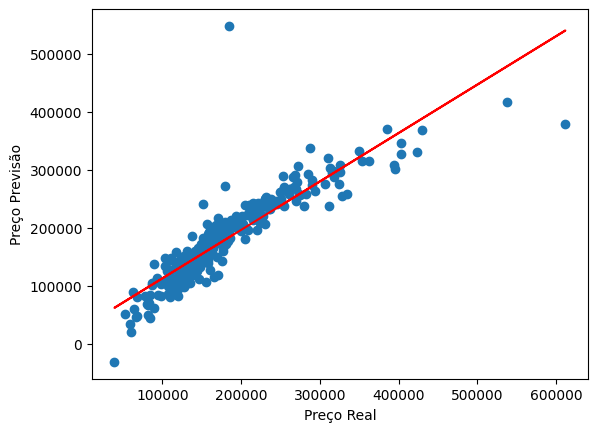

In [57]:
# Visualização gráfica da regressão linear
import matplotlib.pyplot as plt
plt.scatter(y_test, previsao_rl_y)
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsão')
m, b = np.polyfit(y_test, previsao_rl_y, 1)
plt.plot(y_test, m*y_test + b, color='red')

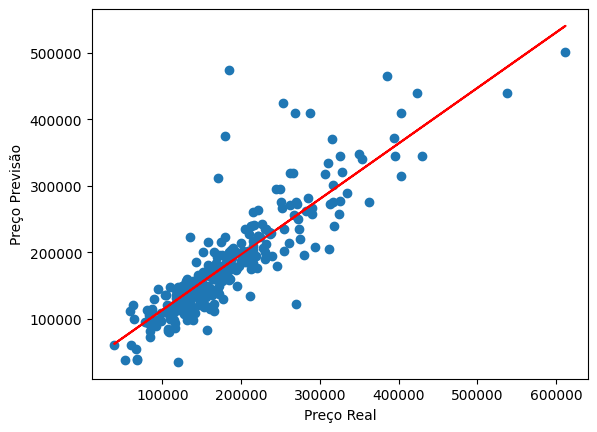

In [58]:
# Visualização gráfica da árvore de decisão
plt.scatter(y_test, previsao_arvore_y)
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsão')
m, b = np.polyfit(y_test, previsao_rl_y, 1)
plt.plot(y_test, m*y_test + b, color='red')

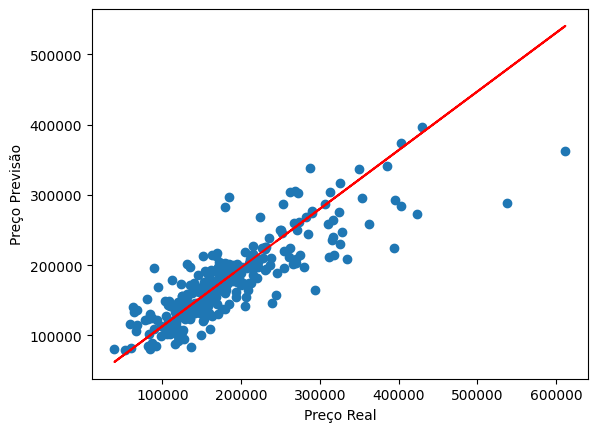

In [59]:
# Visualização gráfica do KNN
plt.scatter(y_test, previsao_knn_y)
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsão')
m, b = np.polyfit(y_test, previsao_rl_y, 1)
plt.plot(y_test, m*y_test + b, color='red')

## Previsão com novos dados

In [66]:
# Carregamento da nova base
base_teste = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
base_teste.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [67]:
base_teste.shape

(1459, 80)

In [68]:
# Removendo colunas não-numéricas
base_teste2 = base_teste.drop(colunas_obj, axis=1)
base_teste2.head()

# Removendo colunas com mais de 10% de valores nulos
base_teste2.drop(dropadas, axis=1, inplace=True)

# Removendo coluna MSSubCLass
base_teste2.drop('MSSubClass', axis=1, inplace=True)

# Preenchendo valores nulos
base_teste2.fillna(-1, inplace=True)

base_teste2.head()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [65]:
base_teste2.shape

(1459, 42)

### Previsão com Regressão Linear

In [69]:
# Utilizando o modelo de regressão linear criado para previsões com a nova base
previsao_rl = regressao_linear.predict(base_teste2)

In [71]:
# Adicionando a coluna com as previsões à base
base_teste2['SalePrice'] = previsao_rl
base_teste2.head()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1461,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,140,0,0,0,120,0,0,6,2010,108813.890504
1,1462,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,393,36,0,0,0,0,12500,6,2010,163638.063712
2,1463,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,212,34,0,0,0,0,0,3,2010,166747.597292
3,1464,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,...,360,36,0,0,0,0,0,6,2010,194882.710392
4,1465,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,...,0,82,0,0,144,0,0,1,2010,204324.476206


In [73]:
# Base de dados apenas com Id e SalePrice
resultado = base_teste2[['Id', 'SalePrice']]
resultado.head()

,Id,SalePrice
0,1461,108813.890504
1,1462,163638.063712
2,1463,166747.597292
3,1464,194882.710392
4,1465,204324.476206


In [77]:
# Exportaão do resultado para CSV
resultado.to_csv('/content/drive/MyDrive/Colab Notebooks/result_house_prices.csv', index=False)

In [78]:
from google.colab import files
files.download('/content/drive/MyDrive/Colab Notebooks/result_house_prices.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>